Name: Kalyani Dhawade<br>
Class: TE-4 (K-4)<br>
Roll No: 31416

# Data Analytics II
#### 1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.<br>2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

### Loading dataset

In [2]:
# data source: https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv

df = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")
df1 = df.copy()    # original data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data preprocessing

In [3]:
print("There are " + str(df.shape[0]) + " records with " + str(df.shape[1]) + " features each.")

There are 400 records with 5 features each.


In [4]:
# displaying technical information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# displaying statistical information of numerical fields in dataset
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# number of null fields
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# unique values of gender in the dataset
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [8]:
# using group by method to calculate gender distribution
print("Number of Records grouped by Gender:\n ")
print(df.groupby(["Gender"])["User ID"].count())

Number of Records grouped by Gender:
 
Gender
Female    204
Male      196
Name: User ID, dtype: int64


### pie chart

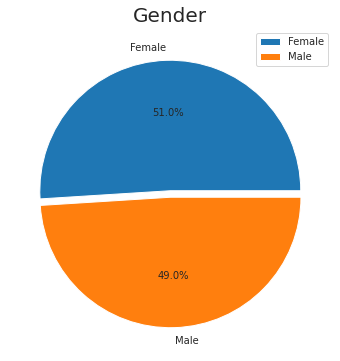

In [9]:
# pie chart distribution for count of male and female records

labels = ['Female', 'Male']
size = df['Gender'].value_counts()
explode = [0, 0.05]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, explode = explode, labels = labels, shadow = False, autopct = '%.1f%%')
plt.title('Gender', fontsize = 20)
plt.legend()
plt.show()

### Converting Categorical Data into Numerical Data

In [10]:
# dropping USER ID

df.drop('User ID', axis = 'columns', inplace = True)
print(df.shape)

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Gender'.
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

(400, 4)


array([1, 0])

<table>
    <tr>
        <th>Categoraical variable<th>
        <th>Quantitative variable<th>
    <tr>
    <tr>
        <td>Male<td>
        <td>1<td>
    <tr>
    <tr>
        <td>Female<td>
        <td>0<td>
    <tr>
<table>

### Outliers checking

<AxesSubplot:xlabel='Age'>

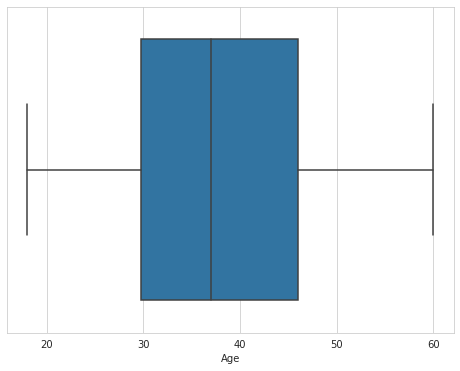

In [11]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='EstimatedSalary'>

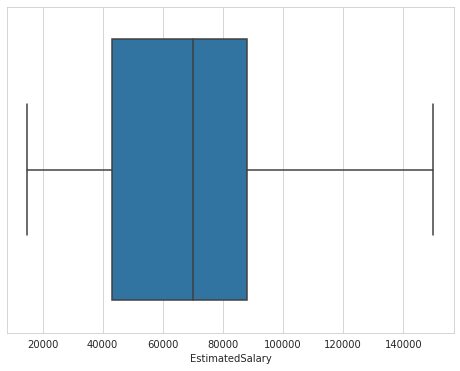

In [12]:
sns.boxplot(x = df['EstimatedSalary'])

In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Splitting the Dataset for Training & Testing

In [31]:
# feature matrix
x = df.iloc[:, range(1,3)].values
print(x)
print('\n')

# target variable
y = df.iloc[:, 3].values
print(y)
print('\n')

# Splitting the dataset into training and testing sets (85% training, 15% testing)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

### Logistic Regression Classifier Model

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#### Confusion Matrix : It is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.
<table>
    <tr>
        <th>Actual values---<br>Predicted values|<th>
        <th>Positive<th>
        <th>Negative<th>
    <tr>
    <tr>
        <th>Positive<th>
        <td>TP<td>
        <td>FP<td>
    <tr>
    <tr>
        <th>Negative<th>
        <td>FN<td>
        <td>TN<td>
    <tr>
<table>

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[45  0]
 [15  0]]


#### this shows, 45 correct and 15 wrong decisions which shows 75% accuracy.

#### Accuracy : Accuracy is how close or far off a given set of measurements are to their true value.
#### Error : Error is the difference between the value which has been computed and the correct value.

In [34]:
Accuracy=(cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1])) # (TP+TN)/total
print("Accuracy:", 100*Accuracy, "%")

error_rate = (cm[0][1]+cm[1][0])/(sum(cm[0])+sum(cm[1])) # (FN+FP)/total
print("Error Rate:", 100*error_rate, "%")

Accuracy: 75.0 %
Error Rate: 25.0 %


#### Precision : The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

In [35]:
precision = (cm[0][0]) / (cm[0][0] + cm[1][0]) # TP/(TP + FP)
print("Precision :", 100*precision, "%")

Precision : 75.0 %


#### Recall : The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [36]:
recall = (cm[0][0]) / (cm[0][0] + cm[0][1]) # TP/(TP + FN)
recall

1.0

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Creating sample Z points
z = np.arange(-5, 5, 0.1)
 
# Invoking Sigmoid function on all Z points
phi_z = sigmoid(z)
 
# Plotting the Sigmoid function
#
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()